In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from tqdm import tqdm
tqdm.pandas()
import matplotlib
# Set the global font to SF Pro Text
matplotlib.rcParams['font.family'] = 'SF Pro Text'

In [2]:
# Reading the CSV file
data = pd.read_csv('Dataset/Combined_data.csv')
# Displaying the first 5 rows of the dataframe.
data.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
data.shape

(153870, 23)

Data has 153870 rows and 23 columns.

In [4]:
# Checking if there are any null values in any of the columns.
data.isnull().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Market            False
Region            False
Product ID        False
Category          False
Sub Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

It can be observed that there are no null values in any of the columns.

In [5]:
# Check the dataframe info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153870 entries, 0 to 153869
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Row ID          153870 non-null  int64  
 1   Order ID        153870 non-null  object 
 2   Order Date      153870 non-null  object 
 3   Ship Date       153870 non-null  object 
 4   Ship Mode       153870 non-null  object 
 5   Customer ID     153870 non-null  object 
 6   Customer Name   153870 non-null  object 
 7   Segment         153870 non-null  object 
 8   City            153870 non-null  object 
 9   State           153870 non-null  object 
 10  Country         153870 non-null  object 
 11  Market          153870 non-null  object 
 12  Region          153870 non-null  object 
 13  Product ID      153870 non-null  object 
 14  Category        153870 non-null  object 
 15  Sub Category    153870 non-null  object 
 16  Product Name    153870 non-null  object 
 17  Sales     

In [6]:
def flexible_to_datetime(date_str):
    """Converts date string to datetime if it's in a recognized format, else returns the original value."""
    
    if isinstance(date_str, str):  # Ensure it's a string before processing
        # Check if the format is '%d/%m/%Y'
        if len(date_str) == 10 and date_str[2] == '/' and date_str[5] == '/':
            return pd.to_datetime(date_str, format='%d/%m/%Y')
        
        # Check if the format is '%Y-%m-%d %H:%M:%S.%f'
        elif len(date_str) > 19 and date_str[4] == '-' and date_str[7] == '-':
            return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S.%f')

        # Check if the format is '%Y-%m-%d %H:%M:%S' (without microseconds)
        elif len(date_str) == 19 and date_str[4] == '-' and date_str[7] == '-':
            return pd.to_datetime(date_str, format='%Y-%m-%d %H:%M:%S')

        # If format is unknown, try automatic conversion
        else:
            return pd.to_datetime(date_str, dayfirst=True)

    return date_str  # Return original if not a string

In [7]:
# Create dataframe copy
processed_data = data.copy()

In [8]:
# Apply the flexible_to_datetime function to the Order Date and Ship Date Columns.
processed_data['Order Date'] = data['Order Date'].progress_apply(flexible_to_datetime)
processed_data['Ship Date']  = data['Ship Date'].progress_apply(flexible_to_datetime)

100%|████████████████████████████████████████████████████████████████████████| 153870/153870 [00:28<00:00, 5490.16it/s]


In [9]:
# Check if the datatypes of the Order Date and Ship Date Columns changed?
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153870 entries, 0 to 153869
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Row ID          153870 non-null  int64         
 1   Order ID        153870 non-null  object        
 2   Order Date      153870 non-null  datetime64[ns]
 3   Ship Date       153870 non-null  datetime64[ns]
 4   Ship Mode       153870 non-null  object        
 5   Customer ID     153870 non-null  object        
 6   Customer Name   153870 non-null  object        
 7   Segment         153870 non-null  object        
 8   City            153870 non-null  object        
 9   State           153870 non-null  object        
 10  Country         153870 non-null  object        
 11  Market          153870 non-null  object        
 12  Region          153870 non-null  object        
 13  Product ID      153870 non-null  object        
 14  Category        153870 non-null  obj

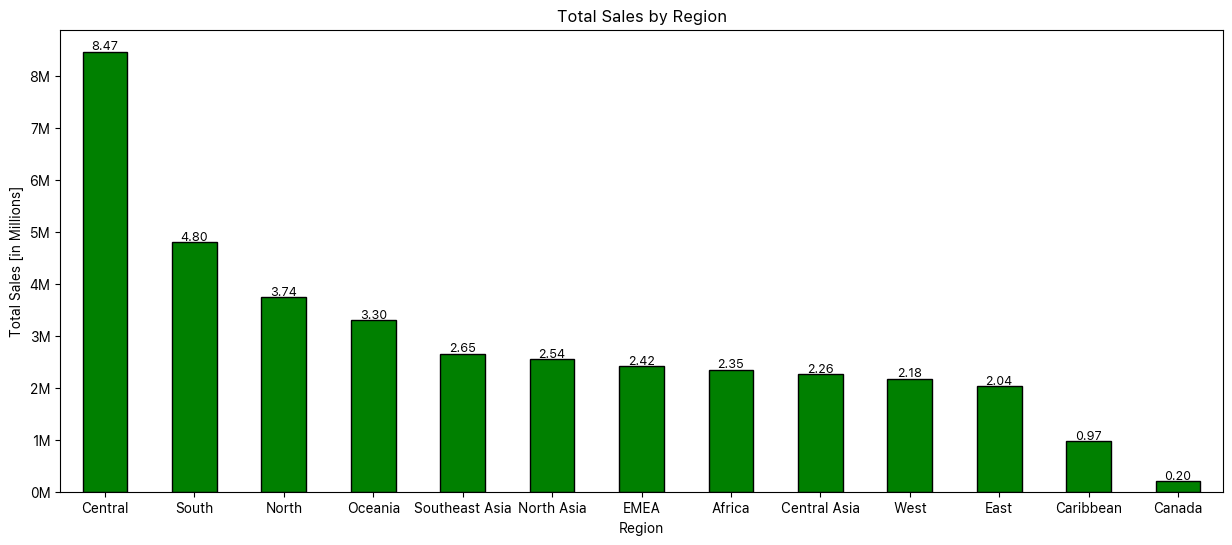

In [10]:
# Plot 1 - Total Sales by each region 

region_sales = processed_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales_millions = region_sales / 1e6

plt.figure(figsize=(15, 6))
ax = region_sales_millions.plot(kind='bar',color='green',edgecolor='black')

plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=0)
# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',size=9)
plt.show()

Observations:
* The Central region has the highest sales, generating 8.47 million in revenue. This suggests a strong customer base or high demand in this region.
* South (4.80M), North (3.74M), and Oceania (3.30M) follow as strong markets. These regions contribute significantly but are not as dominant as Central.
* Canada (0.20M) and Caribbean (0.97M) show the lowest sales. This indicates low market penetration or lower demand in these areas.

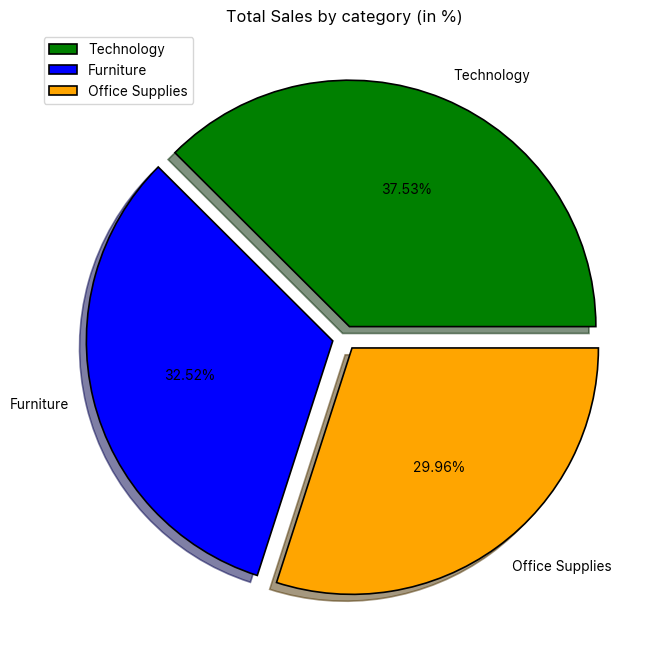

In [11]:
# Plot 2 - Total Sales by each category [in %]

# Calculate total sales by category
category_sales = processed_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
explode = (0.05, 0.05, 0.05)
# Create pie chart
plt.figure(figsize=(12, 8))
plt.pie(category_sales, labels=category_sales.index, autopct='%.2f%%', colors=['green', 'blue', 'orange'],
        explode=explode, wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},
        shadow=True)


plt.title('Total Sales by category (in %)', fontsize=12)
plt.legend(loc='upper left')
plt.show()

Observations:
* The pie chart shows that Technology has the highest sales contribution at 37.53%, making it the dominant category. 
* Furniture (32.52%) and Office Supplies (29.96%) have similar sales shares, indicating a relatively balanced revenue distribution across categories. 
* The chart suggests that Technology is the key revenue driver, while Furniture and Office Supplies still play significant roles.

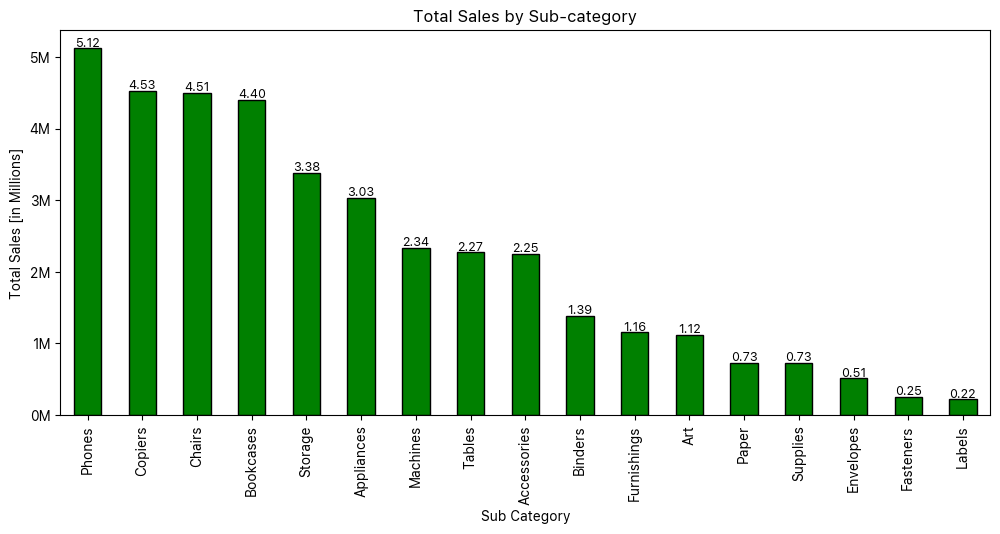

In [12]:
# Plot 3 - Total Sales by each sub category 

sub_category_sales = processed_data.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
sub_category_sales_millions = sub_category_sales / 1e6

plt.figure(figsize=(12, 5))
ax = sub_category_sales_millions.plot(kind='bar',color='green',edgecolor='black')

plt.title('Total Sales by Sub-category')
plt.xlabel('Sub Category')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=90)
# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',size=9,label_type='edge')
plt.show()

Observations:
* Phones (5.12M), Copiers (4.53M), Chairs (4.51M), and Bookcases (4.40M) are top sellers, showing a strong demand for office tech and ergonomics.
* Labels (0.22M), Fasteners (0.25M), and Envelopes (0.51M) lag behind, indicating these smaller consumables are overshadowed by higher-value items.

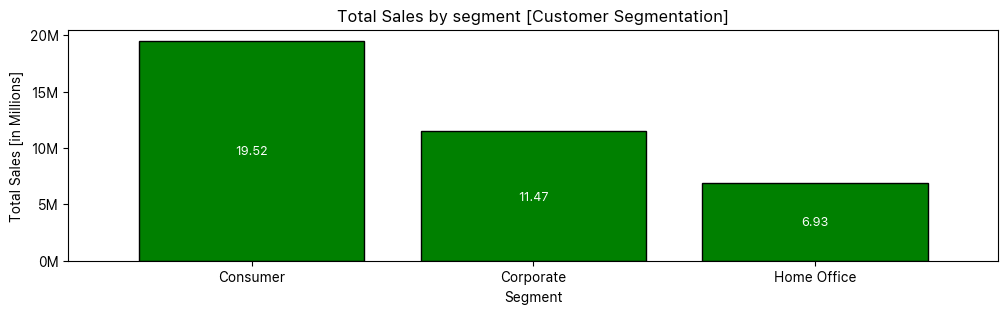

In [13]:
# Plot 4 - Total Sales by each Customer Segment.

segment_sales = processed_data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales_millions = segment_sales / 1e6

plt.figure(figsize=(12, 3))
ax = segment_sales_millions.plot(kind='bar',color='green',edgecolor='black',width=0.8)

plt.title('Total Sales by segment [Customer Segmentation]')
plt.xlabel('Segment')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=0)

# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',size=9,label_type='center',color='white')
plt.show()

Observations:
* Consumers bring in the most revenue at 19.52M, showing that individual buyers are a big source of sales. This suggests a strong retail market.
* At 11.47M, corporate customers (businesses buying in bulk) are also important, but not as large as the consumer segment.
* Home office buyers generate 6.93M, which is smaller than the other segments but could grow further due to increasing remote work and targeted promotions.

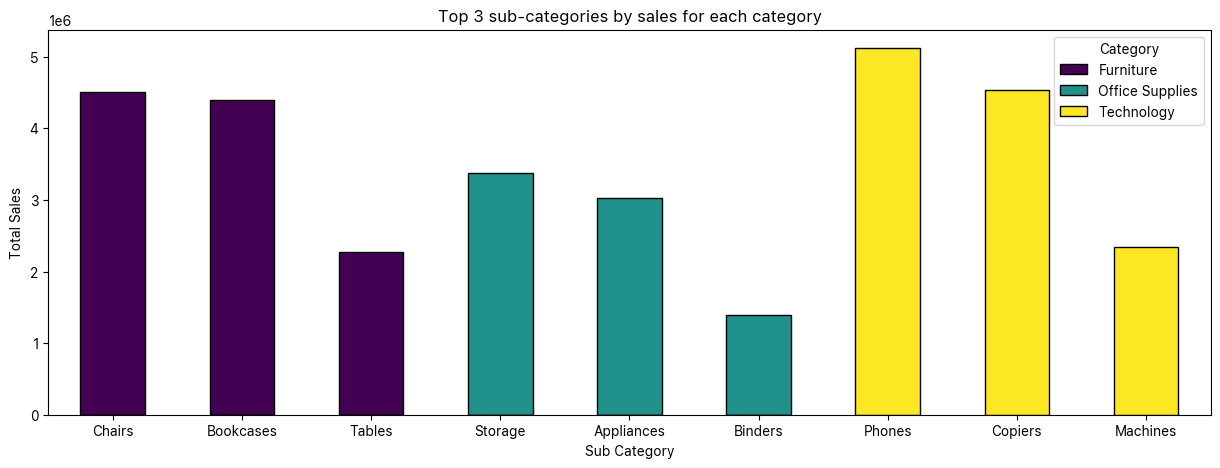

In [14]:
# Plot 5 - Top 3 sub categories by sales for each category

fig, ax = plt.subplots(figsize=(15, 5))
subcategories_category      = processed_data.groupby(['Category', 'Sub Category'])['Sales'].sum()
top3_subcategories_category = subcategories_category.groupby(['Category'],group_keys=False).nlargest(3).unstack(level=0)
top3_subcategories_category.plot(kind='bar',stacked=True, colormap='viridis', edgecolor='black', ax=ax, width=0.5)

plt.title("Top 3 sub-categories by sales for each category")
plt.xlabel("Sub Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Category",loc='upper right')
plt.show()

Observations:
* Technology leads in sales, with Phones and Copiers generating the highest revenue, while Machines have lower sales but still rank in the top 3.
* Furniture sales are driven by Chairs and Bookcases, whereas Tables, though in the top 3, contribute less to overall sales.
* Office Supplies have a more balanced sales pattern, with Storage and Appliances performing well, while Binders have the lowest sales among the top 3 in this category.

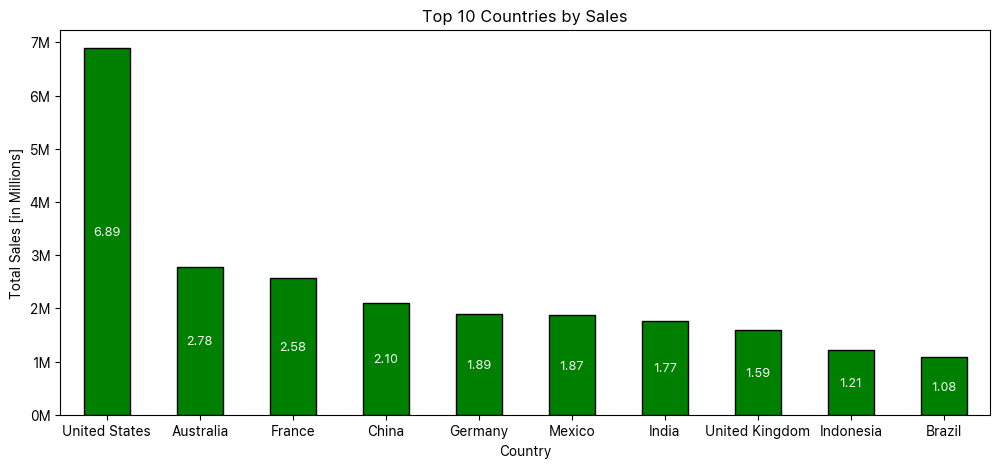

In [15]:
# Plot 6 - Top 10 countries by sales.

top10_country_sales = processed_data.groupby(['Country'])['Sales'].sum().sort_values(ascending=False)[:10]
top10_country_sales_millions = top10_country_sales / 1e6

plt.figure(figsize=(12, 5))
ax = top10_country_sales_millions.plot(kind='bar',color='green',edgecolor='black')

plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=0)
# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',size=9,label_type='center',color='white')
plt.show()

Observations:
* The U.S. dominates with 6.89M in sales, significantly higher than any other country, indicating a strong market presence and demand.
* Australia (2.78M) and France (2.58M) hold the second and third spots, suggesting a stable customer base but much lower than the U.S.
* Countries like China (2.10M), Germany (1.89M), India (1.77M), and Mexico (1.87M) show moderate sales, but with rising economies, they present expansion opportunities.

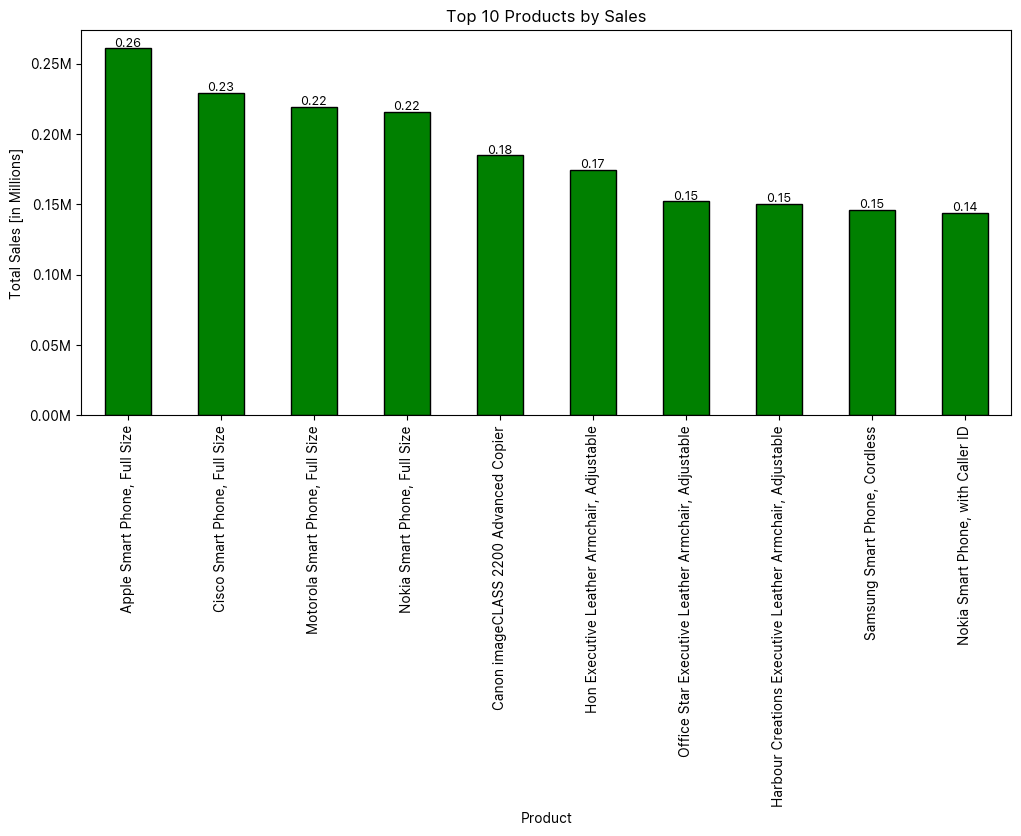

In [16]:
# Plot 7 - Top 10 products by sales.

top10_product_sales = processed_data.groupby(['Product Name'])['Sales'].sum().sort_values(ascending=False)[:10]
top10_product_sales_millions = top10_product_sales / 1e6

plt.figure(figsize=(12, 5))
ax = top10_product_sales_millions.plot(kind='bar',color='green',edgecolor='black')

plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=90)
# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.2f}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.2f',size=9,label_type='edge')
plt.show()

Observations:
* Apple Smart Phone (0.26M) leads sales, followed closely by Cisco, Motorola, and Nokia smartphones.
* Canon ImageCLASS 2200 Advanced Copier (0.18M) ranks high, showing continued reliance on office printing solutions.
* While smartphones dominate, chairs and copiers still maintain strong sales, suggesting that businesses continue to invest in both digital and physical workspaces.

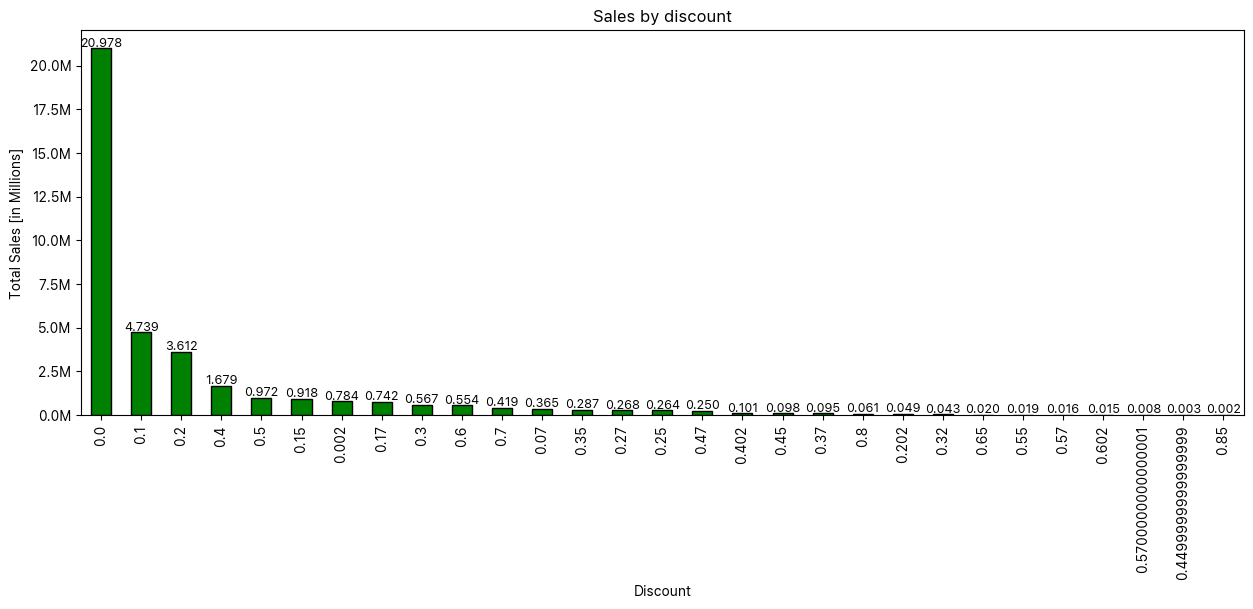

In [17]:
# Plot 8 - Sales by discount

discount_sales = processed_data.groupby(['Discount'])['Sales'].sum().sort_values(ascending=False)
discount_sales_millions = discount_sales / 1e6

plt.figure(figsize=(15, 5))
ax = discount_sales_millions.plot(kind='bar',color='green',edgecolor='black')

plt.title('Sales by discount')
plt.xlabel('Discount')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=90)

# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.3f',size=9,label_type='edge')
plt.show()

Observations:
* 20.97M in sales happened at 0% discount, meaning a significant portion of customers are willing to pay full price.
* Discounts around 10% (4.73M), 20% (3.61M), and 40% (1.67M) still generate good sales, indicating these are effective discount ranges.
* Sales decline sharply beyond 40-50% discounts, suggesting that deep discounts do not necessarily drive higher revenue.

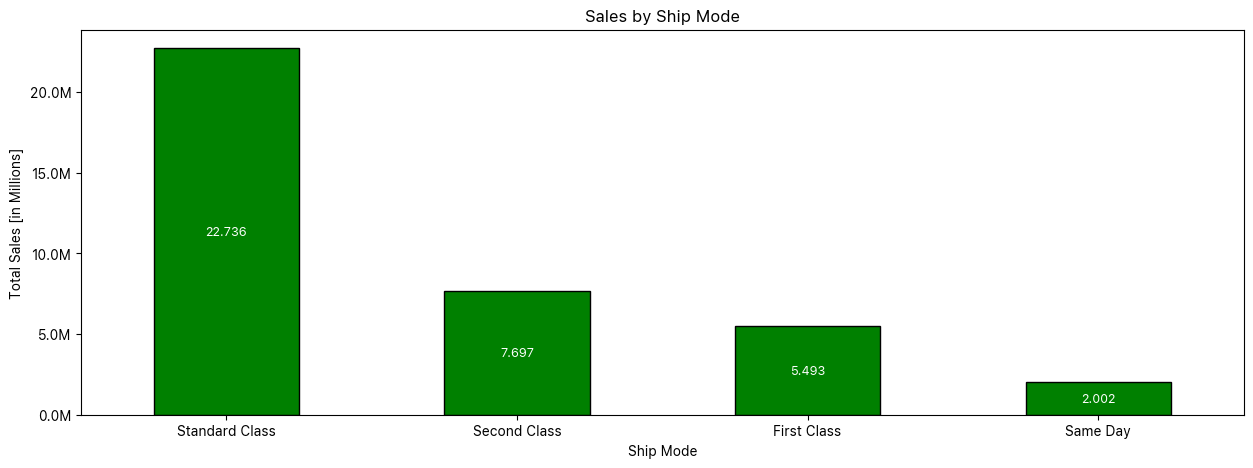

In [18]:
# Plot 9- Sales by Ship Mode

ship_mode_sales = processed_data.groupby(['Ship Mode'])['Sales'].sum().sort_values(ascending=False)
ship_mode_sales_millions = ship_mode_sales / 1e6

plt.figure(figsize=(15, 5))
ax = ship_mode_sales_millions.plot(kind='bar',color='green',edgecolor='black')

plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales [in Millions]')
plt.xticks(rotation=0)

# Format y-axis labels to show in millions (e.g., 8M instead of 8000000.0 M)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x}M'))

for container in ax.containers:
    ax.bar_label(container,fmt='%.3f',size=9,label_type='center',color='white')
plt.show()

Observations:
* 22.73M in sales, making it the preferred and most cost-effective shipping option for customers.
* Second Class (7.69M) and First Class (5.49M) have moderate sales, indicating some demand for quicker deliveries but at a higher cost.
* Only 2.00M in sales, suggesting that customers may not prioritize ultra-fast shipping, possibly due to higher costs or less frequent urgent needs.                                                                                          

In [19]:
# Deriving new column 'Year' by extracting year from the order date column.
processed_data['Year'] = processed_data['Order Date'].dt.year

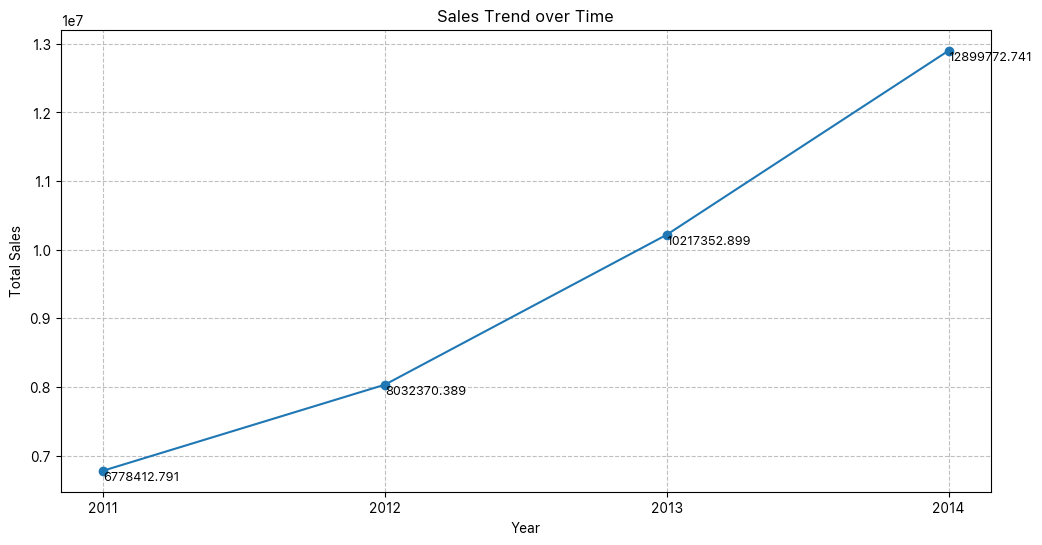

In [20]:
# Plot 10 - Sales trend over time

sales_trend = processed_data.groupby('Year')['Sales'].sum()

# Plot line chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sales_trend.index, sales_trend.values, marker='o', linestyle='-')

plt.title("Sales Trend over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.8)
plt.xticks(ticks=range(sales_trend.index.min(), sales_trend.index.max() + 1))  # Show only integer years

# Add labels with 3 decimal places
for i, value in enumerate(sales_trend.values):
    ax.text(sales_trend.index[i], value, f'{value:.3f}', ha='left', va='top', fontsize=9)

plt.show()

Observations:
* Sales have shown a steady increase from 2011 to 2014, growing from 6.77M in 2011 to 12.89M in 2014.
* The growth rate has accelerated each year, with significant jumps between 2012-2013 and 2013-2014, indicating rising market demand or expansion efforts.
* If this trend continues, investing in key markets, high-performing products, and customer segments could further boost revenue.

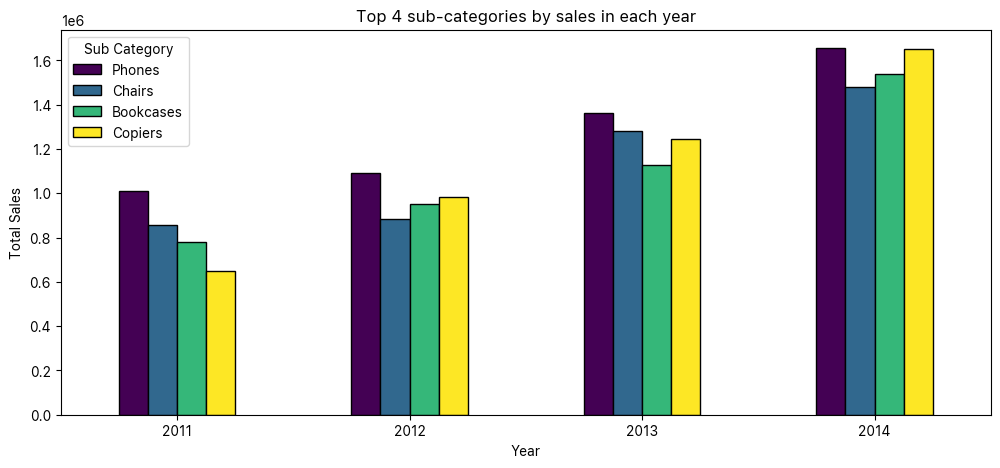

In [21]:
# Plot 11 - Top 4 sub-categories by sales in each year.

fig, ax = plt.subplots(figsize=(12, 5))
top4_subcategories_year = processed_data.groupby(['Year', 'Sub Category'])['Sales'].sum().groupby(['Year'],group_keys=False).nlargest(4).unstack()
top4_subcategories_year.plot(kind='bar',stacked=False, colormap='viridis', edgecolor='black',ax=ax)

plt.title("Top 4 sub-categories by sales in each year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Sub Category")
plt.show()

Observations:
* From 2011 to 2014, sales for Phones, Chairs, Bookcases, and Copiers increased steadily, indicating growing demand.
* While Phones led sales in all years, Copiers experienced rapid growth, surpassing Chairs and Bookcases by 2014. This suggests strong demand for technology-related products, possibly due to increased business and office needs.
* Chairs and Bookcases maintained consistent growth, but their sales increased at a slower rate than Phones and Copiers. This indicates steady market demand for furniture, though less aggressive growth compared to technology-related products.

In [22]:
# Deriving new column 'Month' by extracting month from the order date column.
processed_data['Month'] = processed_data['Order Date'].dt.month

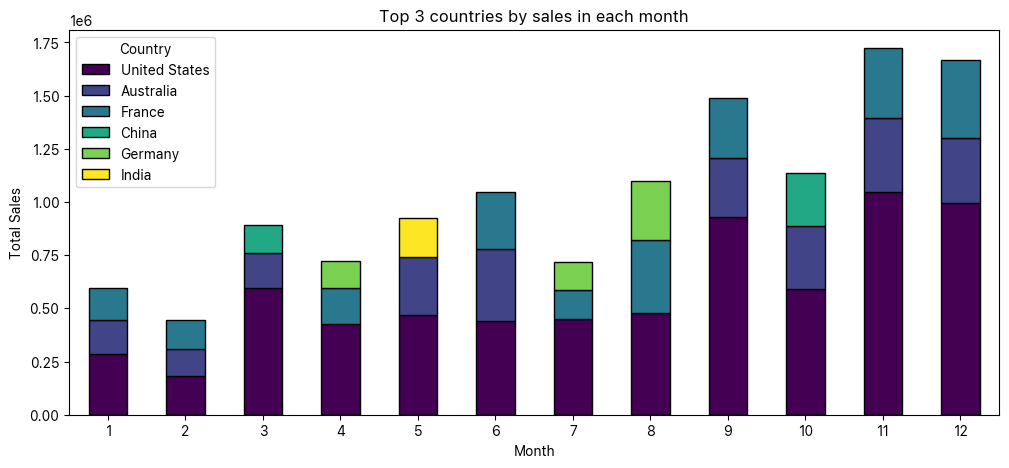

In [23]:
# Plot 12 - Top 3 countries by sales in each month.

fig, ax = plt.subplots(figsize=(12, 5))
monthly_sales = processed_data.groupby(['Month','Country'])['Sales'].sum().groupby(['Month'],group_keys=False).nlargest(3).unstack()
monthly_sales.plot(kind='bar',stacked=True, colormap='viridis', edgecolor='black',ax=ax)

plt.title("Top 3 countries by sales in each month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.legend(title="Country")
plt.show()

Observations:
* United States dominates sales across all months, consistently contributing the largest portion, indicating it is the primary revenue driver.
* Sales show a clear increasing trend over the months, peaking in November and December, suggesting a seasonal effect, possibly due to holiday shopping or end-of-year business spending.
* Other countries contribute variably, with France, China, and Germany showing strong performances in some months, while India appears only in May, indicating occasional spikes in sales from different regions.

In [24]:
processed_data.to_csv('Dataset/EDA.csv', index=False)

In [25]:
# Saving the processed data to a sales.csv file.
processed_data.groupby(['Order Date'])[['Sales']].sum().reset_index().to_csv('Dataset/Sales.csv', index=False)